In [1]:
#Цель проекта: подготовить данные для построения будущей модели
#Задачи проекта: Ознакомиться с данными, проверить их целенность, проанализировать данные на предмет зависимости со значением 'score'

import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind 

#Добавление всех библиотек

In [2]:
pd.set_option('display.max_rows', 50) #показывать больше строк
pd.set_option('display.max_columns', 50) #показывать больше колонок

In [3]:
df = pd.read_csv('stud_math.xls') #присваиваем значению df таблицу, которые мы прочли с помощью pandas  

In [4]:
display(df.head(10))
df.info()

#Осмотр таблицы, выводим первые 10 строк [0:10]
#Видим значения NaN в номинативных столбцах (dtype object(17)) и числовых столбцах (dtype float(12) и dtype int(1))
#Смена названия столбцов не необходима, кроме "studytime, granular", меняем на "studytime_granular" для удобства

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [5]:
#Добавление функиций

#Проверка столбца (dtype object) на наличие уникальных значений и их количество 
def object_check(column):
    display(pd.DataFrame(column.value_counts()))
    print(column.unique())

#Проверка столбца (dtype float) при помощи гистограммы и 
#его характеристики (количество значений в столбце, среднее, стандартное отклонение, минимальное,
#25-й процентиль, 50-й процентиль, 75-й процентиль и максимальное)
def float_check(column):
    column.hist()
    print(column.describe())
    
    
#Проверка столбца (dtype float) двумя методами для дополнительного анализа уникальных значений, что поможет вывести наличие NaN    
def full_check(column):
    return object_check(column), float_check(column)


#Проверка нулевой гипотезы о том, что распределения баллов студентов по различным параметрам неразличимы
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break
            
#Отображение информации (dtype float): 25-й перцентиль, 75-й перцентиль, межквартильный размах (IQR), границы выбросов.           
#Отображение размаха между границами выбросов и значения вне этих границ
def quantile_plus(column, range_begin, range_end, not_more_then):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    f = q1 - 1.5*IQR
    l = q3 + 1.5*IQR
    print(
        '25-й перцентиль: {},'.format(q1),
        '75-й перцентиль: {},'.format(q3),
        "IQR: {}, ".format(IQR),
        "Границы выбросов: [{}, {}].".format(f, l))
    column.loc[column.between(
        f, l)].hist(bins=10, range=(range_begin, range_end), label='IQR')

    column.loc[column <= not_more_then].hist(
        alpha=0.5, bins=10, range=(range_begin, range_end), label='Здравый смысл')

    plt.legend()
    
    
#Инструмент для анализа номинативных столбцов (dtype object) и их взаимосвзяь с успеваемостью по математике
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=df.loc[df.loc[:, column].isin(
                    df.loc[:, column].value_counts().index[:])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot для ' + column)
    plt.show()

In [6]:
#Меняем название столбца 
df = df.rename(columns={"studytime, granular": "studytime_granular"})

#Меняем значение NaN для номинативных столбцов на None (при обработке данных в MySQL - наличие NaN выдаёт ошибку)
df = df.astype(object).replace(np.nan, 'None')

In [7]:
# После смены NaN на None изменился тип данных float в столбцах на object. Меняем обратно тип данных на float
df.Medu = pd.to_numeric(df.Medu, errors='coerce')
df.Fedu = pd.to_numeric(df.Fedu, errors='coerce')
df.traveltime = pd.to_numeric(df.traveltime, errors='coerce')
df.studytime = pd.to_numeric(df.studytime, errors='coerce')
df.failures = pd.to_numeric(df.failures, errors='coerce')
df.famrel = pd.to_numeric(df.famrel, errors='coerce')
df.freetime = pd.to_numeric(df.freetime, errors='coerce')
df.goout = pd.to_numeric(df.goout, errors='coerce')
df.health = pd.to_numeric(df.health, errors='coerce')
df.absences = pd.to_numeric(df.absences, errors='coerce')
df.score = pd.to_numeric(df.score, errors='coerce')
df.studytime_granular = pd.to_numeric(df.studytime_granular, errors='coerce')

# Заполняем NaN значения на медиану в каждом столбце
df.Medu = df.Medu.fillna(df.Medu.median())
df.Fedu = df.Fedu.fillna(df.Fedu.median())
df.traveltime = df.traveltime.fillna(df.traveltime.median())
df.studytime = df.studytime.fillna(df.studytime.median())
df.failures = df.failures.fillna(df.failures.median())
df.famrel = df.famrel.fillna(df.famrel.median())
df.freetime = df.freetime.fillna(df.freetime.median())
df.goout = df.goout.fillna(df.goout.median())
df.health = df.health.fillna(df.health.median())
df.absences = df.absences.fillna(df.absences.median())
df.studytime_granular = df.studytime_granular.fillna(
    df.studytime_granular.median())
df.score = df.score.fillna(df.score.median())

In [8]:
# Далее идёт проверка всех столбцов в зависимости от типа данных этих столбцов

In [9]:
object_check(df.school)

,school
GP,349
MS,46


['GP' 'MS']


In [10]:
object_check(df.sex)

,sex
F,208
M,187


['F' 'M']


,age
16,104
17,98
15,82
18,82
19,24
20,3
21,1
22,1


[18 17 15 16 19 22 20 21]
count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64


(None, None)

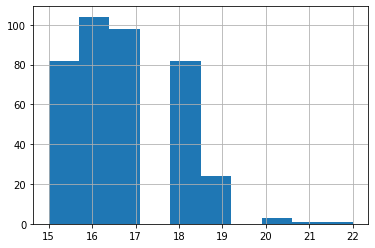

In [11]:
full_check(df.age)

In [12]:
object_check(df.address)

,address
U,295
R,83
None,17


['U' 'None' 'R']


In [13]:
object_check(df.famsize)

,famsize
GT3,261
LE3,107
None,27


['None' 'GT3' 'LE3']


In [14]:
object_check(df.Pstatus)

,Pstatus
T,314
None,45
A,36


['A' 'None' 'T']


,Medu
4.0,131
2.0,102
3.0,100
1.0,59
0.0,3


[4. 1. 3. 2. 0.]
count    395.000000
mean       2.751899
std        1.094154
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64


(None, None)

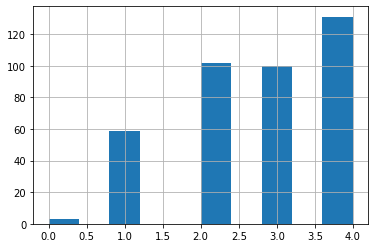

In [15]:
full_check(df.Medu)

,Fedu
2.0,130
3.0,96
4.0,89
1.0,78
0.0,2


[4. 1. 2. 3. 0.]
count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64


(None, None)

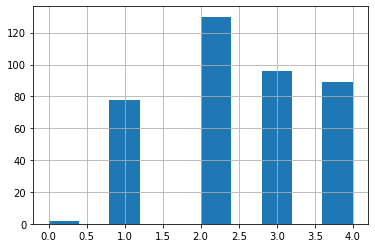

In [16]:
# Заметили ошибку, было указано "40.0" меняем на "4.0", есть большая вероятность, что лишняя ноль была добавлена случайно
df.Fedu = df.Fedu.astype(str).apply(lambda x: float(x.replace('40.0', '4.0')))
full_check(df.Fedu)

In [17]:
object_check(df.Mjob)

,Mjob
other,133
services,98
at_home,58
teacher,55
health,32
None,19


['at_home' 'health' 'other' 'services' 'teacher' 'None']


In [18]:
object_check(df.Fjob)

,Fjob
other,197
services,102
None,36
teacher,29
at_home,16
health,15


['teacher' 'other' 'None' 'health' 'services' 'at_home']


In [19]:
object_check(df.reason)

,reason
course,137
home,104
reputation,103
other,34
None,17


['course' 'other' 'home' 'reputation' 'None']


In [20]:
object_check(df.guardian)

,guardian
mother,250
father,86
None,31
other,28


['mother' 'father' 'other' 'None']


,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


[2. 1. 3. 4.]
count    395.000000
mean       1.407595
std        0.678490
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64


(None, None)

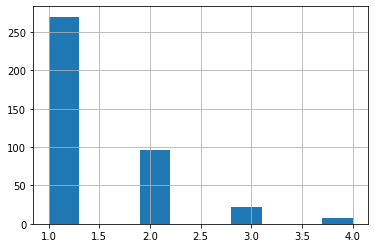

In [21]:
full_check(df.traveltime)

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


[2. 3. 1. 4.]
count    395.000000
mean       2.037975
std        0.834580
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64


(None, None)

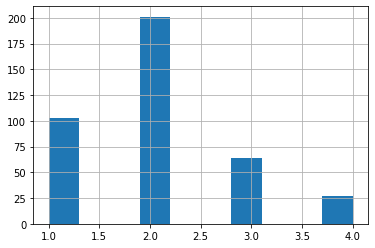

In [22]:
full_check(df.studytime)

,failures
0.0,315
1.0,49
2.0,16
3.0,15


[0. 3. 2. 1.]
count    395.000000
mean       0.318987
std        0.726244
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64


(None, None)

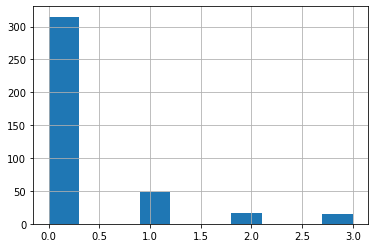

In [23]:
full_check(df.failures)

In [24]:
object_check(df.schoolsup)

,schoolsup
no,335
yes,51
None,9


['yes' 'no' 'None']


In [25]:
object_check(df.famsup)

,famsup
yes,219
no,137
None,39


['no' 'yes' 'None']


In [26]:
object_check(df.paid)

,paid
no,200
yes,155
None,40


['no' 'None' 'yes']


In [27]:
object_check(df.activities)

,activities
yes,195
no,186
None,14


['no' 'yes' 'None']


In [28]:
object_check(df.nursery)

,nursery
yes,300
no,79
None,16


['yes' 'no' 'None']


,studytime_granular
6.0,201
3.0,103
9.0,64
12.0,27


[ 6.  9.  3. 12.]
count    395.000000
mean       6.113924
std        2.503740
min        3.000000
25%        3.000000
50%        6.000000
75%        6.000000
max       12.000000
Name: studytime_granular, dtype: float64


(None, None)

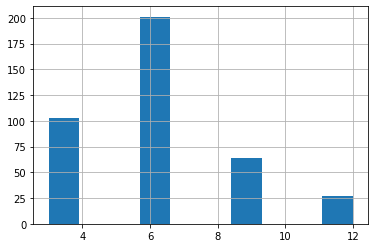

In [29]:
#Столбец, который не был указан при задании.
#Моё предположение, что речь идёт о частоте раздробленного обучения вне школы в течение 7 дней: 
#studytime с обозначением 1, где максимально 2 часа, равняется studytime_granular с обозначением 3, где 1 - 40 мин.
#Меняем минус на '', хотя при корреляционном анализе большой роли играть не будет
df.studytime_granular = df.studytime_granular.astype(
    str).apply(lambda x: float(x.replace('-', '')))
full_check(df.studytime_granular)

In [30]:
object_check(df.higher)

,higher
yes,356
None,20
no,19


['yes' 'None' 'no']


In [31]:
object_check(df.internet)

,internet
yes,305
no,56
None,34


['None' 'yes' 'no']


In [32]:
object_check(df.romantic)

,romantic
no,240
yes,124
None,31


['no' 'None' 'yes']


,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,8


[4. 5. 3. 1. 2.]
count    395.000000
mean       3.946835
std        0.872425
min        1.000000
25%        4.000000
50%        4.000000
75%        4.500000
max        5.000000
Name: famrel, dtype: float64


(None, None)

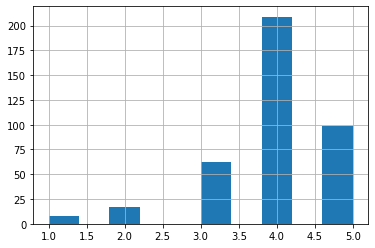

In [33]:
#Меняем минус на ''
df.famrel = df.famrel.astype(str).apply(
    lambda x: float(x.replace('-1.0', '1.0')))
full_check(df.famrel)

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


[3. 2. 4. 1. 5.]
count    395.000000
mean       3.225316
std        0.980711
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64


(None, None)

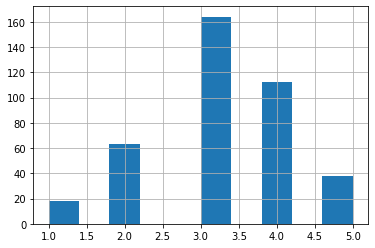

In [34]:
full_check(df.freetime)

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


[4. 3. 2. 1. 5.]
count    395.000000
mean       3.103797
std        1.104610
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64


(None, None)

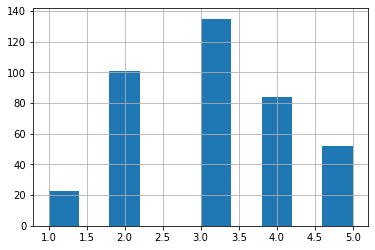

In [35]:
full_check(df.goout)

,health
5.0,138
3.0,89
4.0,78
1.0,47
2.0,43


[3. 5. 1. 2. 4.]
count    395.000000
mean       3.549367
std        1.372118
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64


(None, None)

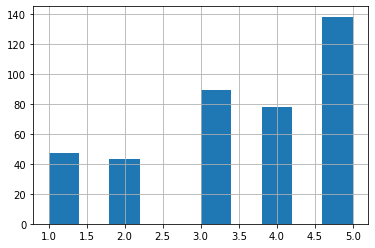

In [36]:
full_check(df.health)

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
14.0,12
12.0,12
3.0,8
16.0,7


[  6.   4.  10.   2.   0.  16.  14.   7.   8.  25.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]
count    395.000000
mean       7.179747
std       23.111967
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64


(None, None)

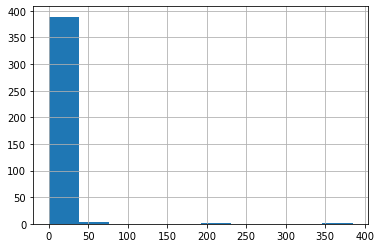

In [37]:
#выдаёт сомнительные значения (выбросы). Необходимо узнать границы.
full_check(df.absences)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


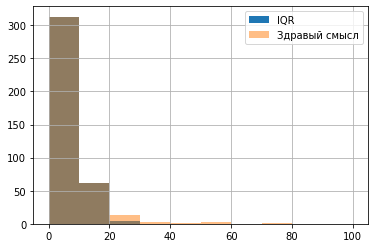

In [38]:
#Здравый смысл показывает границы выбросов, что даёт нам понять, до какого значения оптимально учитывать значения.
quantile_plus(df.absences, 0, 100, 100)

In [39]:
#Устанавливаем ограничения для значений, исходя из проверки выше
df = df.loc[df.absences <= 40]

,absences
0.0,111
4.0,65
2.0,60
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


[ 6.  4. 10.  2.  0. 16. 14.  7.  8. 25. 12. 18. 26. 20. 24. 28.  5. 13.
 15. 22.  3. 21.  1. 30. 19.  9. 11. 38. 40. 23. 17.]
count    390.000000
mean       5.266667
std        6.242377
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64


(None, None)

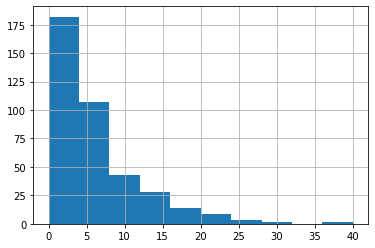

In [40]:
full_check(df.absences)

,score
50.0,54
55.0,51
0.0,37
75.0,33
65.0,31
60.0,31
40.0,30
70.0,27
45.0,25
80.0,16


[ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]
count    390.000000
mean      52.282051
std       22.816975
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64


(None, None)

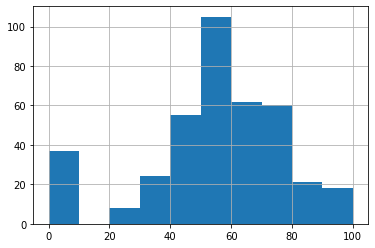

In [41]:
full_check(df.score)

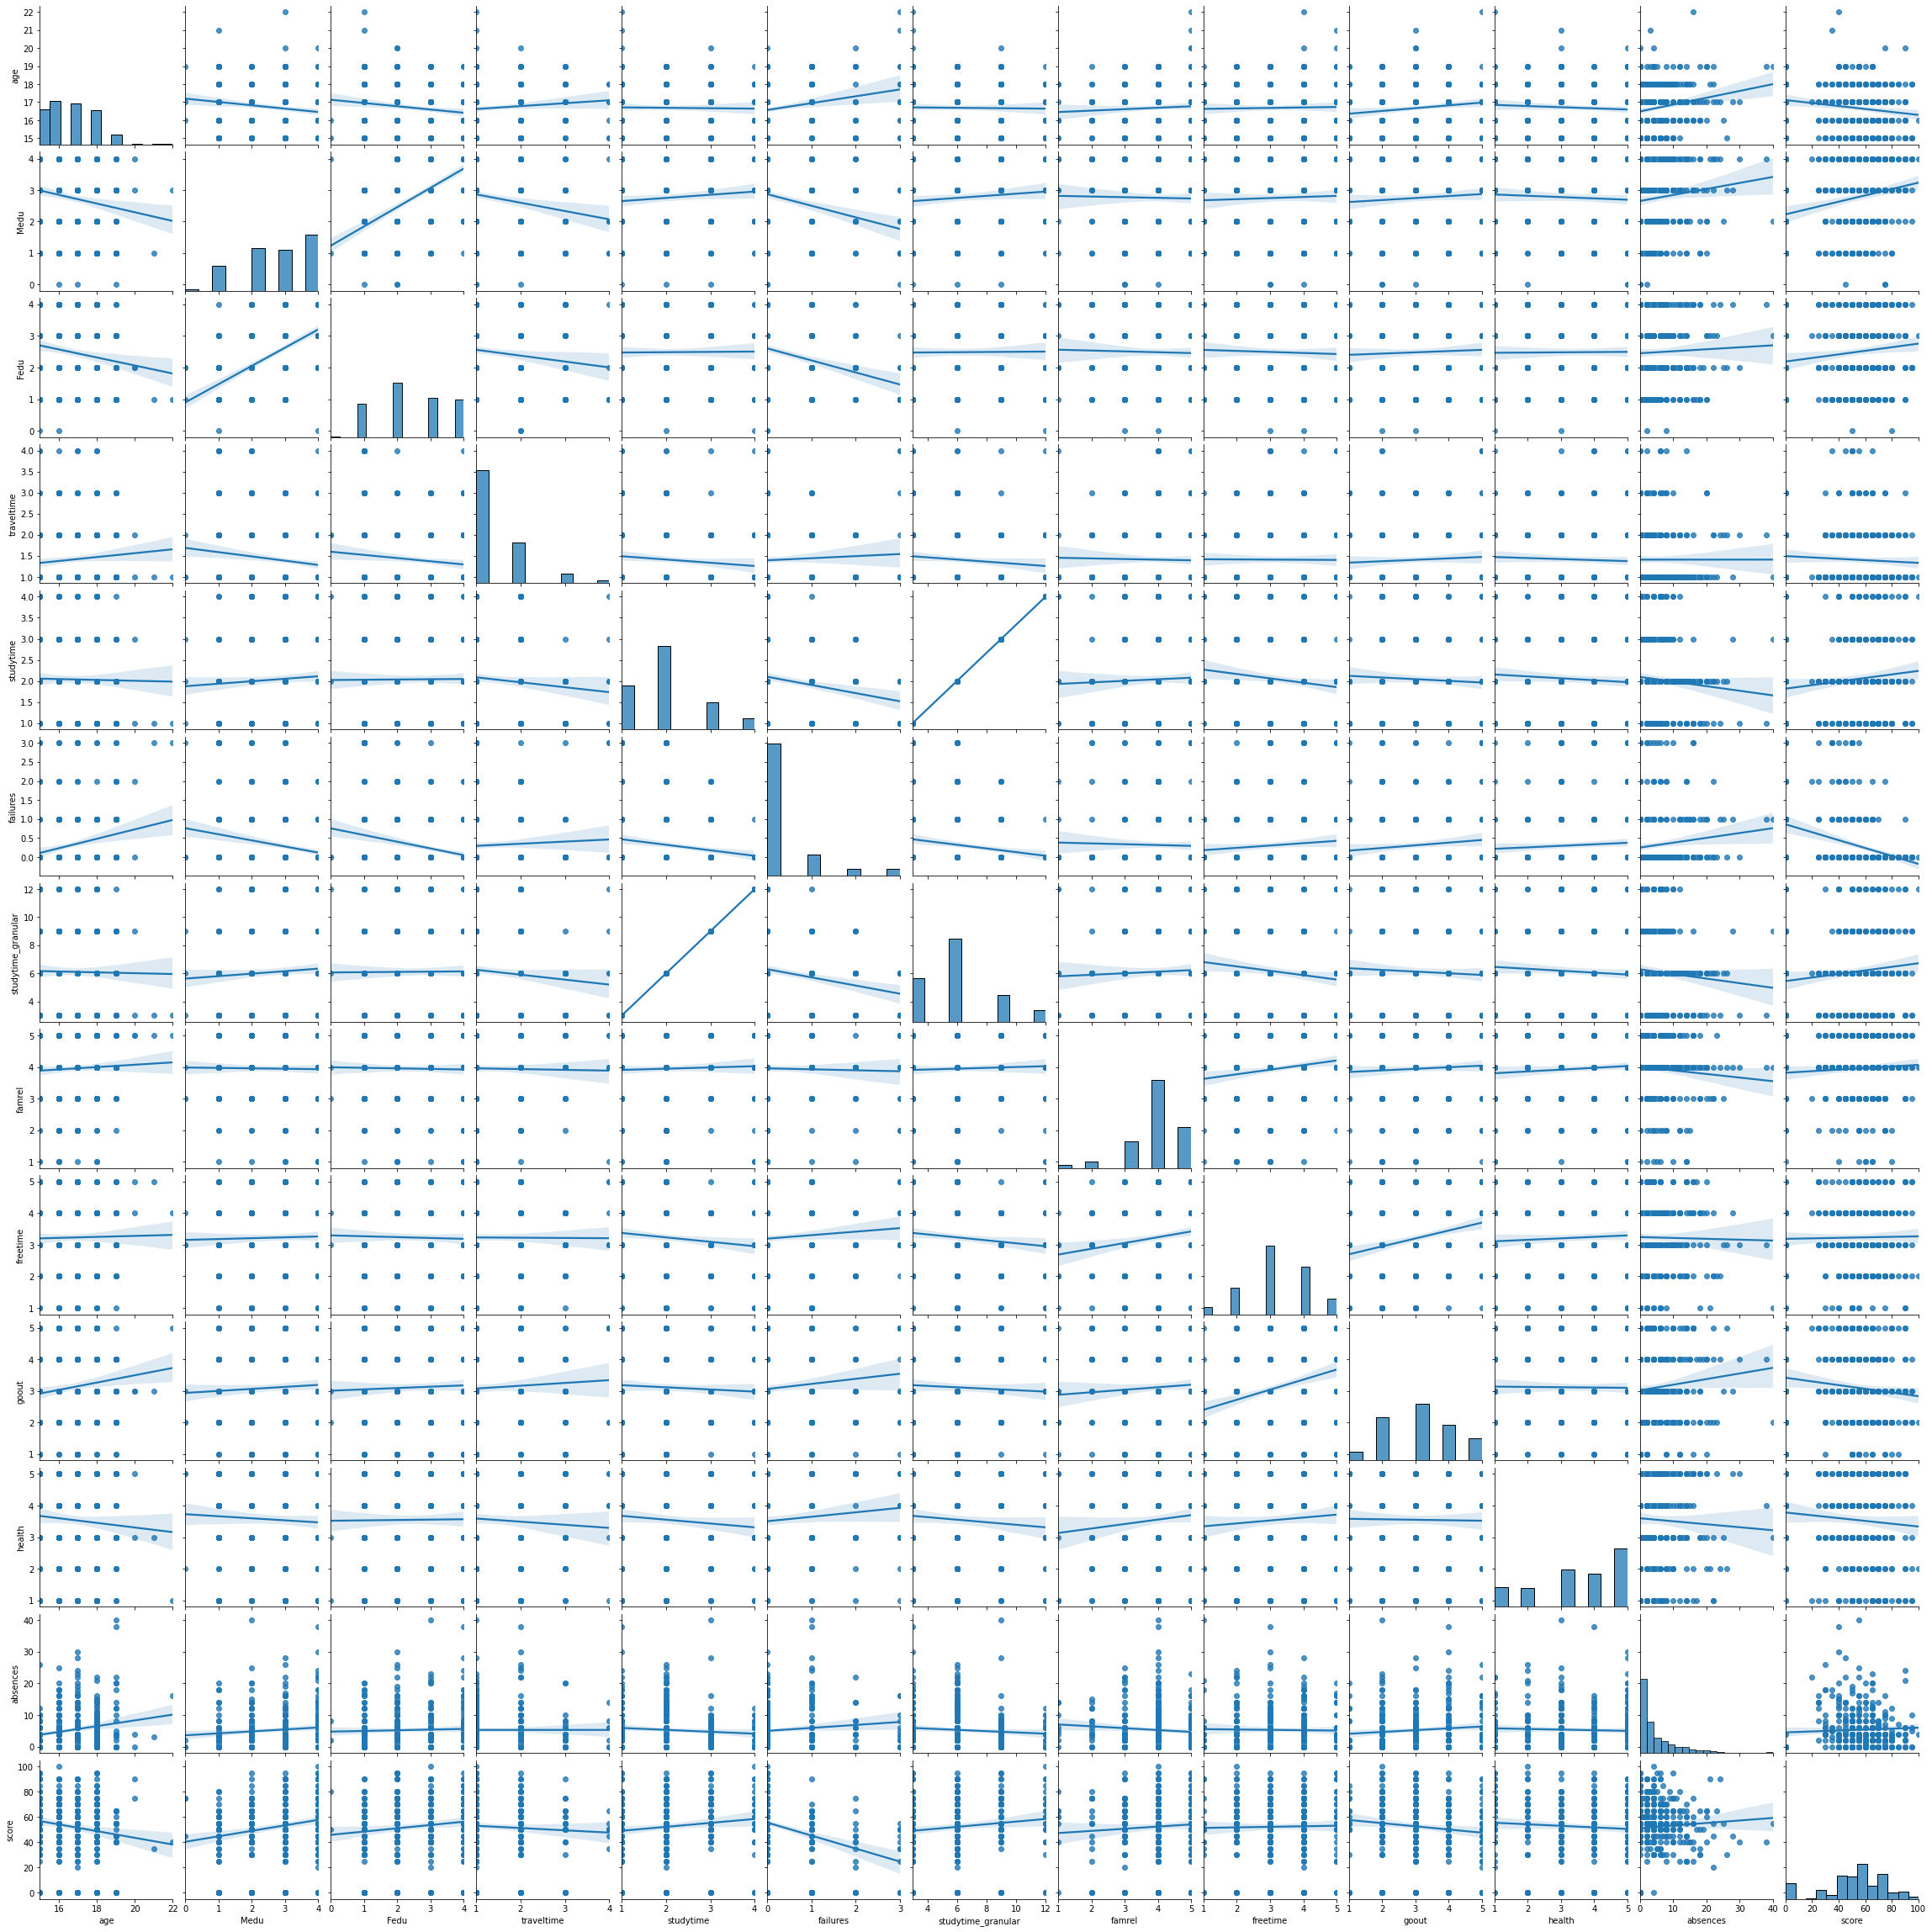

In [42]:
#Определяем зависимость переменных. Но значений слишком много. 
sns.pairplot(df, kind='reg')

In [43]:
#Анализируем данные и для наглядности используем матрицу корреляций 
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160151,-0.151390,0.086332,-0.015196,0.217057,-0.015196,0.054549,0.020399,0.133803,-0.068004,0.185589,-0.147799
Medu,-0.160151,1.000000,0.594546,-0.163478,0.077078,-0.243315,0.077078,-0.016593,0.030912,0.063375,-0.051728,0.108456,0.208921
Fedu,-0.151390,0.594546,1.000000,-0.118597,0.007828,-0.259287,0.007828,-0.021672,-0.029921,0.040867,0.009298,0.036489,0.121219
traveltime,0.086332,-0.163478,-0.118597,1.000000,-0.095085,0.052728,-0.095085,-0.019045,-0.005851,0.054718,-0.049022,0.000202,-0.053796
studytime,-0.015196,0.077078,0.007828,-0.095085,1.000000,-0.167846,1.000000,0.038058,-0.120469,-0.051991,-0.074216,-0.081390,0.114792
failures,0.217057,-0.243315,-0.259287,0.052728,-0.167846,1.000000,-0.167846,-0.025788,0.082441,0.106340,0.074908,0.109561,-0.327497
studytime_granular,-0.015196,0.077078,0.007828,-0.095085,1.000000,-0.167846,1.000000,0.038058,-0.120469,-0.051991,-0.074216,-0.081390,0.114792
famrel,0.054549,-0.016593,-0.021672,-0.019045,0.038058,-0.025788,0.038058,1.000000,0.162981,0.062812,0.089615,-0.082158,0.065192
freetime,0.020399,0.030912,-0.029921,-0.005851,-0.120469,0.082441,-0.120469,0.162981,1.000000,0.282292,0.065650,-0.017606,0.018685
goout,0.133803,0.063375,0.040867,0.054718,-0.051991,0.106340,-0.051991,0.062812,0.282292,1.000000,-0.012177,0.101144,-0.121369


In [44]:
# Избавляемся от данных, которые не корреляционный отбор


df.drop(['traveltime', 'studytime_granular', 'famrel', 'freetime',
        'health', 'absences'], inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      390 non-null    object 
 1   sex         390 non-null    object 
 2   age         390 non-null    int64  
 3   address     390 non-null    object 
 4   famsize     390 non-null    object 
 5   Pstatus     390 non-null    object 
 6   Medu        390 non-null    float64
 7   Fedu        390 non-null    float64
 8   Mjob        390 non-null    object 
 9   Fjob        390 non-null    object 
 10  reason      390 non-null    object 
 11  guardian    390 non-null    object 
 12  studytime   390 non-null    float64
 13  failures    390 non-null    float64
 14  schoolsup   390 non-null    object 
 15  famsup      390 non-null    object 
 16  paid        390 non-null    object 
 17  activities  390 non-null    object 
 18  nursery     390 non-null    object 
 19  higher      390 non-null    o

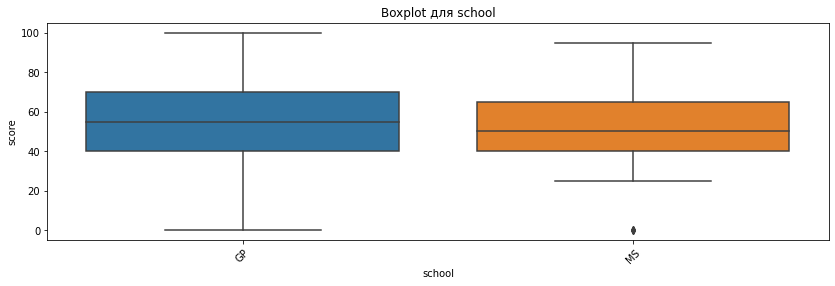

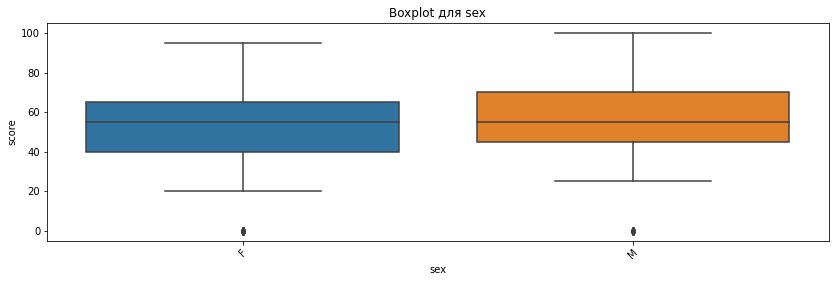

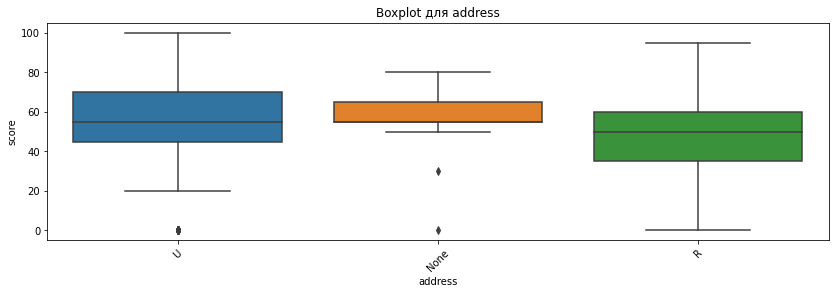

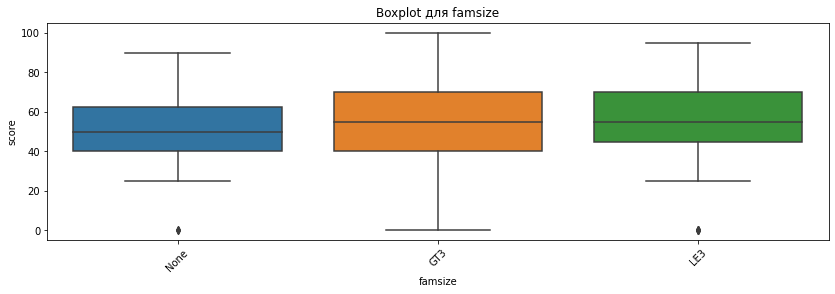

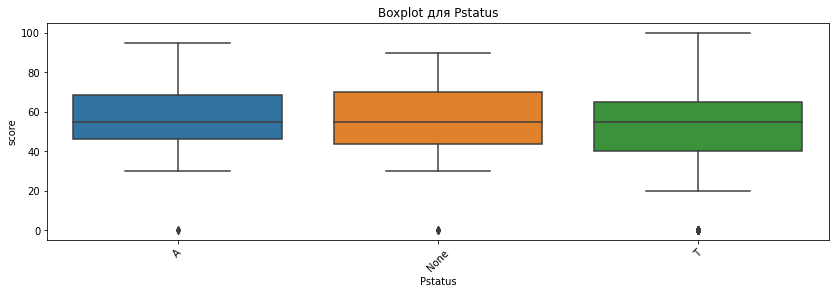

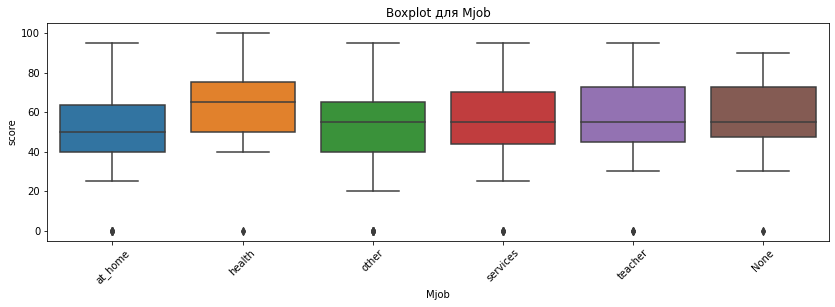

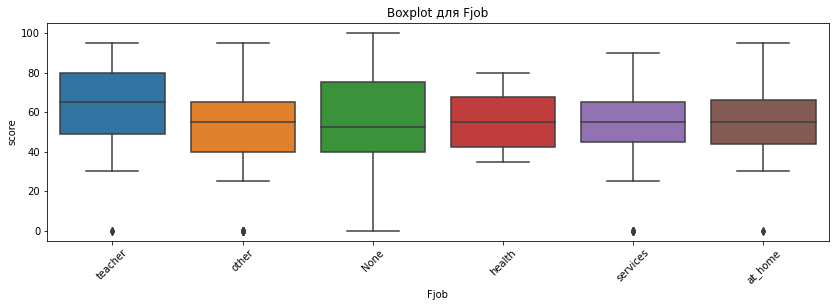

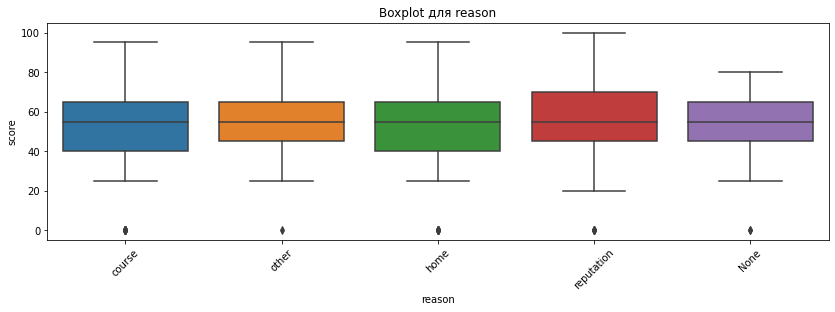

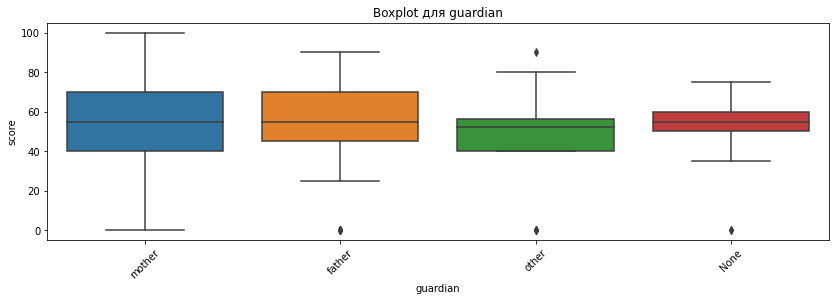

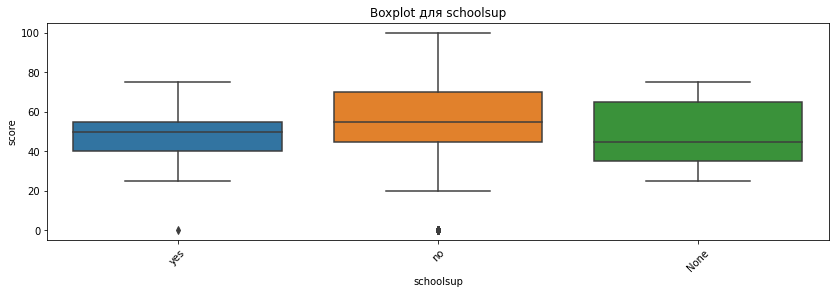

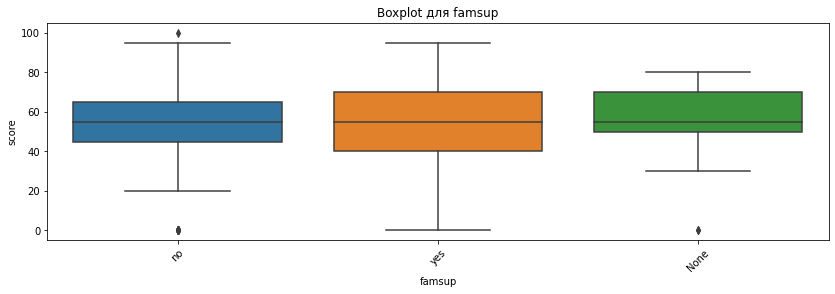

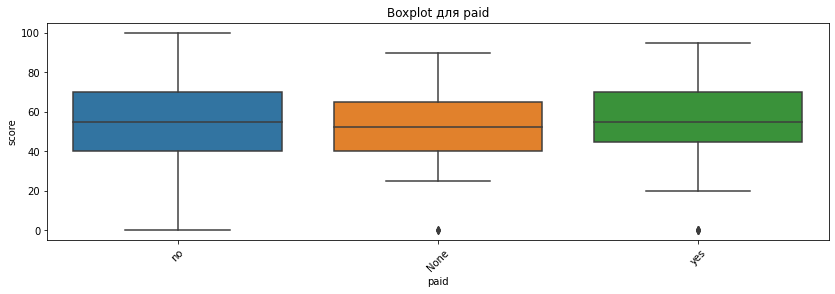

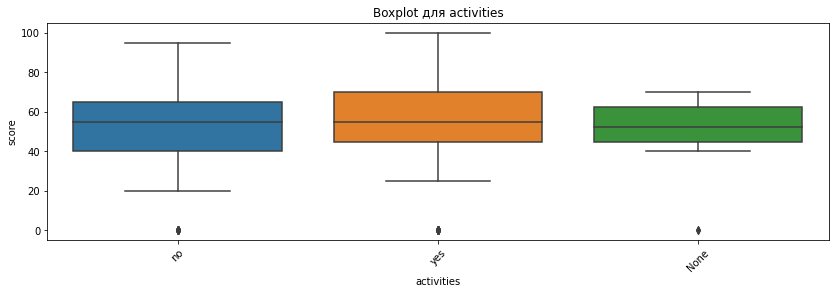

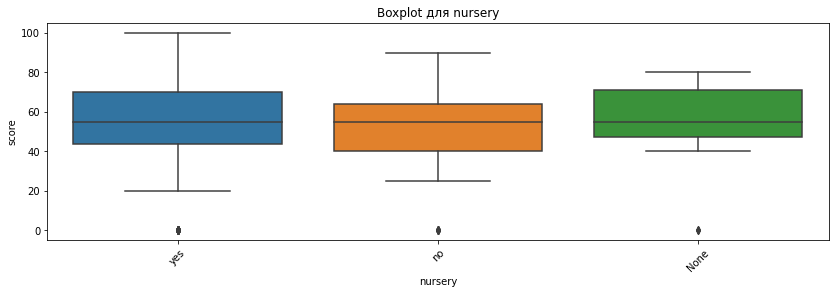

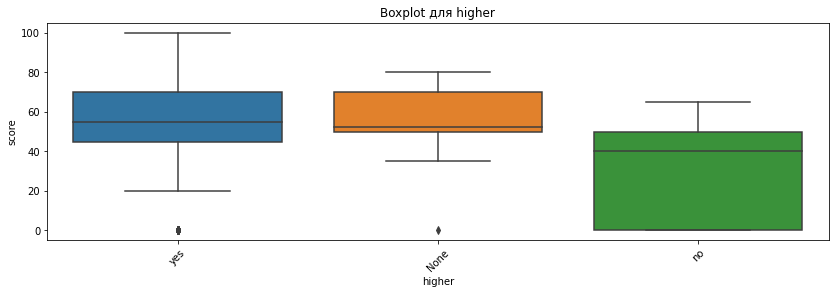

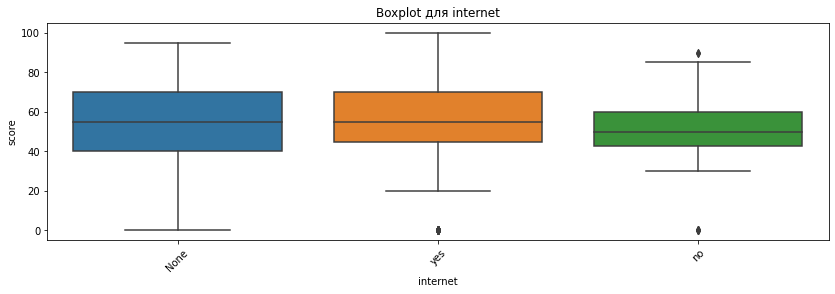

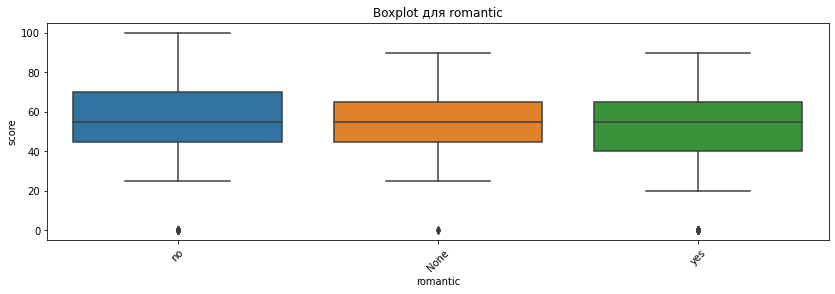

In [45]:
# Анализ номинативных переменных при помощи заготовленной функции 

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup',
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

In [46]:
# Проверка данных по нулевой гипотезе

for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason',
            'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [47]:
# Подготовка данных для дальнейшего построения модели

df_for_model = df.loc[:, ['sex', 'higher', 'romantic', 'age', 'Medu', 'Fedu',
                          'studytime', 'failures', 'goout']]
df_for_model.head(10)

,sex,higher,romantic,age,Medu,Fedu,studytime,failures,goout
0,F,yes,no,18,4.0,4.0,2.0,0.0,4.0
1,F,yes,no,17,1.0,1.0,2.0,0.0,3.0
2,F,yes,None,15,1.0,1.0,2.0,3.0,2.0
3,F,yes,yes,15,4.0,2.0,3.0,0.0,2.0
4,F,yes,no,16,3.0,3.0,2.0,0.0,2.0
5,M,yes,no,16,4.0,3.0,2.0,0.0,2.0
6,M,yes,no,16,2.0,2.0,2.0,0.0,4.0
7,F,yes,no,17,4.0,4.0,2.0,0.0,4.0
8,M,yes,no,15,3.0,2.0,2.0,0.0,2.0
9,M,yes,no,15,3.0,4.0,2.0,0.0,1.0
